In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Добавление датасетов в Юпитер

In [2]:
orders = pd.read_csv('orders.csv', delimiter=',')
visitors = pd.read_csv('visitors.csv', delimiter=',')

#### Вывод первых 5 строк датасета orders


In [3]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


#### Вывод первых 5 строк датасета visitors

In [4]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


# Предварительная обрабока данных

## Таблица Orders

#### Вывод информации о датасете 

Датасет содержит 1197 значений и 5 столбцов

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


#### Проверка на пустые строки

Так как пустые строки отсутствуют, то оставляем все как есть

In [6]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

#### Проверка на явные дубликаты

Явные дубликаты отсутствуют

In [7]:
orders.duplicated().sum()

0

#### Проверка на неявные дубликаты

Неявные дубликаты также отсутстуют 

In [8]:
for nameCol in orders.columns.to_list():
    print(orders[nameCol].unique())

[3667963787 2804400009 2961555356 ... 1807773912 1947021204 3936777065]
[3312258926 3642806036 4069496402 ...  370388673  573423106 2108080724]
['2019-08-15' '2019-08-16' '2019-08-01' '2019-08-22' '2019-08-17'
 '2019-08-23' '2019-08-02' '2019-08-18' '2019-08-24' '2019-08-03'
 '2019-08-25' '2019-08-28' '2019-08-19' '2019-08-06' '2019-08-26'
 '2019-08-29' '2019-08-04' '2019-08-20' '2019-08-09' '2019-08-07'
 '2019-08-30' '2019-08-05' '2019-08-27' '2019-08-21' '2019-08-08'
 '2019-08-10' '2019-08-31' '2019-08-11' '2019-08-12' '2019-08-13'
 '2019-08-14']
[   1650     730     400    9759    2308    2210    1860    1044   13710
    1855    4008    4499    7370   11985   10980   15277    1060     990
   16490    1190     300    1050     632   15185    7555    3488    7620
    5280     700     190     383    1680   22785    2355    2470    6250
   19260     610    2986    1090    9290    2480    3000    2140    3590
    6990    1250    2970   18100     100    2750     570    2978    1440
    786

#### Изменение типа данных

Преобразуем поле даты к типу pandas.datetime64[ns]


In [9]:
orders["date"] = orders["date"].astype(np.datetime64)
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 105.3 KB


## Таблица visitors

#### Вывод информации о датасете 

Датасет содержит 62 значения и 3 столбца

In [10]:
visitors.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 8.2 KB


#### Проверка на пустые строки


Так как пустые строки отсутствуют, то оставляем все как есть


In [11]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

#### Проверка на явные дубликаты


Явные дубликаты отсутствуют


In [12]:
visitors.duplicated().sum()

0

#### Проверка на неявные дубликаты

Неявные дубликаты также отсутстуют


In [13]:
for nameCol in visitors.columns.to_list():
    print(visitors[nameCol].unique())

['2019-08-01' '2019-08-02' '2019-08-03' '2019-08-04' '2019-08-05'
 '2019-08-06' '2019-08-07' '2019-08-08' '2019-08-09' '2019-08-10'
 '2019-08-11' '2019-08-12' '2019-08-13' '2019-08-14' '2019-08-15'
 '2019-08-16' '2019-08-17' '2019-08-18' '2019-08-19' '2019-08-20'
 '2019-08-21' '2019-08-22' '2019-08-23' '2019-08-24' '2019-08-25'
 '2019-08-26' '2019-08-27' '2019-08-28' '2019-08-29' '2019-08-30'
 '2019-08-31']
['A' 'B']
[719 619 507 717 756 667 644 610 617 406 718 595 748 735 628 361 412 668
 502 575 646 609 468 395 621 722 711 594 577 490 699 713 581 509 770 707
 655 709 654 369 721 543 769 746 544 413 421 737 487 560 656 650 546 378
 679 676 720 531]


#### Изменение типа данных

Преобразуем поле даты к типу pandas.datetime64[ns]


In [14]:
visitors["date"] = visitors["date"].astype(np.datetime64)
visitors.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.6 KB


### Задание под пунктом 5

Выполним поиск пересекающихся пользователей в таблице orders и удалим их


In [15]:
ordersGroupA = orders[orders['group'] == 'A']
ordersGroupB = orders[orders['group'] == 'B']

In [16]:
delCnt = 0
for indexA, rowOrderA in ordersGroupA.iterrows():
    for indexB, rowOrderB in ordersGroupB.iterrows():
        if rowOrderA['visitorId'] == rowOrderB['visitorId']:
            orders = orders.drop(orders[orders.visitorId == rowOrderA['visitorId']].index)
            delCnt += 1
            continue
            
print('Deleted ')
print(delCnt)

Deleted 
183


В результате поиска было удалено 183 пользователя

### Задание под пунктом 6

Создали массив уникальных пар дат и групп теста


In [17]:
datesGroups = orders[['date','group']].drop_duplicates()

### Задание под пунктом 7

Получим кумулятивные агрегированные даные по дням о заказах

In [18]:
ordersAgreagated = datesGroups.apply(
    lambda x: 
        orders[np.logical_and(
            orders['date'] <= x['date'], 
            orders['group'] == x['group'])
        ].
        agg({'date' : 'max', 
             'group' : 'max', 
             'transactionId' : 'nunique', 
             'visitorId' : 'nunique', 
             'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAgreagated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


### Задание под пунктом 8

Получим кумулятивные агрегированные данные по дням о посетителях


In [19]:
visitorsAggregated = datesGroups.apply(lambda x: 
    visitors[np.logical_and(
        visitors['date'] <= x['date'], 
        visitors['group'] == x['group'])
    ].
    agg({'date' : 'max', 
         'group' : 'max', 
         'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


### Задание под пунктом 9

Объеденяем данные в одной таблице и заменяем названия столбцов

In [20]:
cumulativeData = ordersAgreagated
cumulativeData = cumulativeData.join(visitorsAggregated.drop(['date', 'group'], axis=1), sort=False)
cumulativeData.rename(columns={'transactionId': 'orders', 'visitorId': 'byers'}, inplace=True)
cumulativeData.head()

,date,group,orders,byers,revenue,visitors
55,2019-08-01,A,23,19,142779,719
66,2019-08-01,B,17,17,59758,713
175,2019-08-02,A,42,36,234381,1338
173,2019-08-02,B,40,39,221801,1294
291,2019-08-03,A,66,60,346854,1845


### Задание под пунктом 10

4 вариант – Изобразить точечный график числа заказов по пользователям

Для этого с помощью groupby была получена таблица ordersByUsers следующего вида

In [21]:
#создадим таблицу по заказам

ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head()

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


А затем построен точечный график с помощью scatter по оси у – отложено ‘orders’, по оси х - pd.Series(range(0,len(ordersByUsers)))

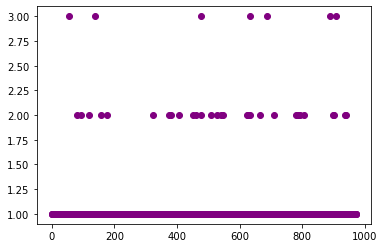

In [22]:
fig, ax = plt.subplots()
ax.scatter(pd.Series(range(0,len(ordersByUsers))), ordersByUsers["orders"], c = 'purple') 
plt.show()

В результате построения данного графика можно сделать вывод, что наибольшее число посетителей имеют всего 1 заказ.

# 2 часть

## Таблица log_exp

In [23]:
log_exp = pd.read_csv('logs_exp.csv', delimiter='\t')

#### Вывод первых 5 строк датасета

In [24]:
log_exp.head(5)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


#### Вывод информации о датасете

Датасет содержит 244126 значение и 4 столбца

In [25]:
log_exp.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 22.9 MB


#### Проверка на пустые строки

Так как пустые строки отсутствуют, то оставляем все как есть

In [26]:
log_exp.isna().sum()

EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

#### Проверка на явные дубликаты


In [27]:
log_exp.duplicated().sum()

413

Найдено 413 явных дубликатов

#### Производим удаление явных дубликатов

In [28]:
log_exp = log_exp.drop_duplicates().reset_index()
log_exp.duplicated().sum()

0

#### Проверка на неявные дубликаты

Неявные дубликаты также отсутстуют


In [29]:
for nameCol in log_exp.columns.to_list():
    print(log_exp[nameCol].unique())

[     0      1      2 ... 244123 244124 244125]
['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial']
[4575588528974610257 7416695313311560658 3518123091307005509 ...
 6660805781687343085 7823752606740475984 3454683894921357834]
[1564029816 1564053102 1564054127 ... 1565212483 1565212498 1565212517]
[246 248 247]


### Задание под пунктом 5

Вывод на экран количество каждого события в порядке убывания частоты (event_name).


In [30]:
dfP5 = log_exp
dfP5['Count'] = [1 for i in range(0, len(dfP5))]
dfP5 = dfP5[['EventName', 'Count']]
print(dfP5.groupby('EventName').count().sort_values(by='Count', ascending=False))

                          Count
EventName                      
MainScreenAppear         119101
OffersScreenAppear        46808
CartScreenAppear          42668
PaymentScreenSuccessful   34118
Tutorial                   1018


Исходя из полученных значений можно сделать вывод, что событие MainScreenAppear встречается чаще


### Задание под пунктом 6

Подсчет количества пользователей, которые совершали каждое из этих действий


In [31]:
print(log_exp.groupby('EventName').agg(
    {'DeviceIDHash': ['nunique']}))

                        DeviceIDHash
                             nunique
EventName                           
CartScreenAppear                3749
MainScreenAppear                7439
OffersScreenAppear              4613
PaymentScreenSuccessful         3547
Tutorial                         847


Наибольшее количество пользователей у MainScreenAppear

### Задание под пунктом 7


Определение количества пользователей в каждой группе


In [35]:
users = log_exp.groupby('ExpId')['DeviceIDHash'].nunique().reset_index() 
users

,ExpId,DeviceIDHash
0,246,2489
1,247,2520
2,248,2542


Наибольшее количество пользователей в группе 248

### Задание под пунктом 8

Нахождение пользователей, которые пересекаются (присутствуют в обоихгруппах), если они есть

In [ ]:
a = log_exp.groupby('DeviceIDHash').agg({'ExpId': ['nunique']})
print(a)

In [ ]:
for el in a.itertuples():
    a1, a2 = el
    if a2 > 1:
        print(a1)

Никакие данные не вывелись, следовательно, пересекающиеся пользователи отсутствуют

#### Задание под пунктом 9

Провести А\А тест: Нулевая гипотеза - группы 246 и 247 не имеют различий Альтернативная гипотеза - группа 246 и 247 отличаются


In [ ]:
import math
from scipy import stats

In [ ]:
log_exp = log_exp.rename(columns={'EventName':'event_name','DeviceIDHash': 'user_id', 'EventTimestamp': 'event_time','ExpId':'group'}) 

In [ ]:
def test_groups(group_a, group_b, event, alpha):
    #получим количество успехов
    group_users = np.array([log_exp.query('event_name == @event and group == @group_a').user_id.nunique(),
                            log_exp.query('event_name == @event and group == @group_b').user_id.nunique()])
    #получим количество пользователей в группах
    total_users = np.array([log_exp.query('group == @group_a').user_id.nunique(),
                            log_exp.query('group == @group_b').user_id.nunique()])
    # пропорция успехов в первой группе:
    p1 = group_users[0]/total_users[0]
    # пропорция успехов во второй группе:
    p2 = group_users[1]/total_users[1]
    # пропорция успехов в комбинированном датасете:
    p_combined = (group_users[0] + group_users[1]) / (total_users[0] + total_users[1])
    # разница пропорций в датасетах
    difference = p1 - p2 
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1 / total_users[0] + 1 / total_users[1]))
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1) 
    distr = stats.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-значение: ', p_value)
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: есть значимая разница между долями')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

In [ ]:
test_groups(246, 247, "PaymentScreenSuccessful", 0.05)

In [ ]:
test_groups(246, 247, "CartScreenAppear", 0.05)

In [ ]:
test_groups(246, 247, "MainScreenAppear", 0.05)

In [ ]:
test_groups(246, 247, "OffersScreenAppear", 0.05)

In [ ]:
test_groups(246, 247, "Tutorial", 0.05)

### Задание под пунктом 10

Проведение А/В теста

In [ ]:
test_groups(246, 248, "CartScreenAppear", 0.05)

In [ ]:
test_groups(246, 248, "MainScreenAppear", 0.05)

In [ ]:
test_groups(246, 248, "OffersScreenAppear", 0.05)

In [ ]:
test_groups(246, 248, "PaymentScreenSuccessful", 0.05)

In [ ]:
test_groups(246, 248, "Tutorial", 0.05)

# Вывод

В ходе выполнения работы были добавлены необходимые датасеты с помощью pandas. Была произведена предварительная обработка данных для каждого набора данных: проверка на наличие пропусков, выявление явных и неявных дубликатов, изменение типов данных столбцов при необходимости. Был произведен поиск пересекающихся и выполнено их удаление. Также был создан массив уникальных пар значений дат и групп теста, получены агрегированные кумулятивные данные по дням о заказах и по дням о посетителях. Произведено объединение данных в одной таблице: date, group, orders, buyers, revenue, visitors. 
Затем было выполнено задание по вариантам. В ходе задания по вариантам был изображен точечный график числа заказов по пользователям. 
Затем была выполнена вторая часть задания, где также был добавлен необходимый датасет и выполнена предварительная обработка данных. Затем был выполнен вывод на экран каждого события в порядке убывания частоты, подсчитано сколько пользователей совершали каждое из этих событий, определено количество пользователей в каждой группе, произведен поиск пользователей, которые пересекаются в группа, но такие не выявлены. Затем были выполнены А/А и А/В тесты.


# Дополнительное задание

3 вариант – Изобразить график конверсии по группам А и B. По оси x – date, по оси y – конверсия. Для подсчета конверсии используйте - cumulativeData['orders']/cumulativeData['visitors']

Разделить cumulativeData на cumulativeRevenueA и cumulativeRevenueB – для группы А и B

In [ ]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B']

In [ ]:
cumulativeRevenueA.head()

In [ ]:
cumulativeRevenueB.head()

### Построение графика

In [ ]:
fig, ax = plt.subplots()
ax.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders']/cumulativeRevenueA['visitors'], linewidth=2.0, label = 'A')
ax.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders']/cumulativeRevenueB['visitors'], linewidth=2.0, label = 'B')
ax.set_title('График конверсии по группам')
ax.set_xlabel('Дата')
ax.set_ylabel('Конверсия')
ax.tick_params(axis='x', rotation=70)
ax.legend()
plt.show()

Исходя из графика можно сделать вывод, что у группы А со временем уменьшается количество заказов к посещениям, у группы В на начальном этапе увеличивается количество заказов к посещениям, но затем примерно становится равным среднему значению